## Importing required modules

In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score

from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()
#insurance =pd.read_csv("balanced_insurance_dataset.csv")

Saving balanced_insurance_dataset.csv to balanced_insurance_dataset.csv


In [7]:
insurance =pd.read_csv("balanced_insurance_dataset.csv")

In [ ]:
insurance.head(10)

,Unnamed: 0,id,Driving_License,Previously_Insured,Vehicle_Damage,Age_Segment_20s,Age_Segment_30s,Age_Segment_40s,Age_Segment_50s,Age_Segment_60s,Age_Segment_70plus,Premium_Segment_0-10k,Premium_Segment_10-20k,Premium_Segment_20-30k,Premium_Segment_30-40k,Premium_Segment_40-50k,Premium_Segment_50-60k,Premium_Segment_60-70k,Premium_Segment_70plus,Months_On_Books_1.0 months,Months_On_Books_10.0 months,Months_On_Books_2.0 months,Months_On_Books_3.0 months,Months_On_Books_4.0 months,Months_On_Books_5.0 months,Months_On_Books_6.0 months,Months_On_Books_7.0 months,Months_On_Books_8.0 months,Months_On_Books_9.0 months,Policy_channel_type_Affinity Group,Policy_channel_type_Direct Response,Policy_channel_type_Exclusive/Captive Agents,Policy_channel_type_Independent Agencies,Policy_channel_type_Internet,Policy_channel_type_others,Region_Andhra Pradesh,Region_Goa,Region_Haryana,Region_Maharashtra,Region_Others,Region_West Bengal,Gender_F,Gender_M,Response
0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
3,3,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,4,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
5,5,6,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,6,7,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
7,7,8,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
8,8,9,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
9,9,10,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


The field unnamed 0 is unnecessary. to be dropped.

## Train test split for model training and testing

In [8]:
from sklearn.model_selection import train_test_split

X = insurance.drop(['Response', 'Unnamed: 0'], axis=1)
y = insurance['Response']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [12]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [ ]:
print('shape of X_train:' , X_train.shape,  ',Shape of y_train:', y_train.shape, 'Shape of X_test:', X_test.shape, 'Shape of y_test:' ,y_test.shape)

shape of X_train: (467241, 42) ,Shape of y_train: (467241,) Shape of X_test: (200247, 42) Shape of y_test: (200247,)


# Model training

## Logistic Regression

In [9]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

In [ ]:
X_train.head(10)

,id,Driving_License,Previously_Insured,Vehicle_Damage,Age_Segment_20s,Age_Segment_30s,Age_Segment_40s,Age_Segment_50s,Age_Segment_60s,Age_Segment_70plus,Premium_Segment_0-10k,Premium_Segment_10-20k,Premium_Segment_20-30k,Premium_Segment_30-40k,Premium_Segment_40-50k,Premium_Segment_50-60k,Premium_Segment_60-70k,Premium_Segment_70plus,Months_On_Books_1.0 months,Months_On_Books_10.0 months,Months_On_Books_2.0 months,Months_On_Books_3.0 months,Months_On_Books_4.0 months,Months_On_Books_5.0 months,Months_On_Books_6.0 months,Months_On_Books_7.0 months,Months_On_Books_8.0 months,Months_On_Books_9.0 months,Policy_channel_type_Affinity Group,Policy_channel_type_Direct Response,Policy_channel_type_Exclusive/Captive Agents,Policy_channel_type_Independent Agencies,Policy_channel_type_Internet,Policy_channel_type_others,Region_Andhra Pradesh,Region_Goa,Region_Haryana,Region_Maharashtra,Region_Others,Region_West Bengal,Gender_F,Gender_M
21685,21727,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
543091,53086,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
339529,340234,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
385002,71759,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
591531,13250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
456529,16992,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
643886,282360,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
435687,44689,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
96332,96531,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
544946,13390,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [10]:
y_predicted =logreg_model.predict(X_test)

In [ ]:
y_train.value_counts()

0    233874
1    233367
Name: Response, dtype: int64

In [11]:
print('Logistic Regression Performance')
print('Accuracy: ' ,accuracy_score(y_predicted,y_test))
print( 'Recall: ' ,recall_score(y_predicted,y_test))
print('Precision: ' ,precision_score(y_predicted,y_test))
print('f1 score: ' ,f1_score(y_predicted,y_test))
print('roc_auc_score: ' ,roc_auc_score(y_predicted,y_test))

Logistic Regression Performance
Accuracy:  0.8615559783667172
Recall:  0.8474209137994109
Precision:  0.8811399513508644
f1 score:  0.863951553935016
roc_auc_score:  0.8621060656282912


The model is giving an accuracy of 86% on the test set. Recall is ~85% and Precision is ~88%.
Since we are more concerned about not letting any potential leads out of hand and also optimize the resources, we can work on the roc_auc metric.

roc_curve:  (array([0.        , 0.12320878, 1.        ]), array([0.        , 0.84742091, 1.        ]), array([2, 1, 0], dtype=int64))


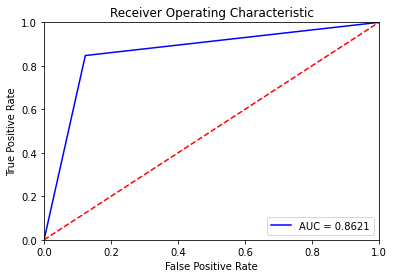

In [15]:
import matplotlib.pyplot as plt
print('roc_curve: ' ,roc_curve(logreg_model.predict(X_test),y_test))
fpr_logreg,tpr_logreg,threshold_logreg = roc_curve(logreg_model.predict(X_test),y_test)
roc_auc_logreg = auc(fpr_logreg,tpr_logreg)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b',label = 'AUC = %0.4f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Listing out a range of Regularization parameters Cs to fit the Logistic regression model
C =[0.01, 0.1, 1, 10, 100, 1000]
penalties =['l1' ,'l2']

#Listing out all scoring metrices on gridsearchcv to find the metric for roc_auc
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [17]:
gridsearch_logreg= GridSearchCV(logreg, param_grid = {'C': C, 'penalty': penalties}, cv =5, scoring= 'roc_auc')

In [26]:
model_logreg = gridsearch_logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

In [27]:
print(model_logreg.best_params_,model_logreg.best_score_)

{'C': 0.01, 'penalty': 'l2'} 0.8651314961866289


With regularization value of 0.01 and l2 penalty we can get an roc_auc of ~0.87 on the model.

Let's compare the logistic regression plot with the new plot of the optimized model.

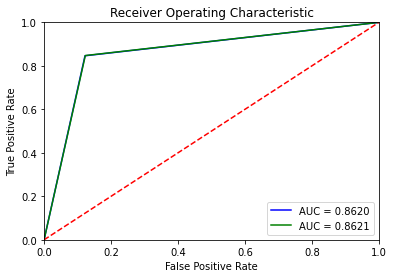

In [18]:
import matplotlib
from matplotlib import pyplot as plt
logreg =LogisticRegression(C=0.01, penalty ='l2')
best_logreg_model = logreg.fit(X_train, y_train)
fpr_logreg_best,tpr_logreg_best,threshold_logreg_best = roc_curve(best_logreg_model.predict(X_test),y_test)
roc_auc_logreg_best = auc(fpr_logreg_best,tpr_logreg_best)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_best,tpr_logreg_best, 'b',label = 'AUC = %0.4f' % roc_auc_logreg_best)
plt.plot(fpr_logreg,tpr_logreg, 'g',label = 'AUC = %0.4f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
y_predicted = best_logreg_model.predict(X_test)
print('Logistic Regression Best model Performance')
print('Accuracy: ' ,accuracy_score(y_predicted,y_test))
print( 'Recall: ' ,recall_score(y_predicted,y_test))
print('Precision: ' ,precision_score(y_predicted,y_test))
print('f1 score: ' ,f1_score(y_predicted,y_test))
print('roc_auc_score: ' ,roc_auc_score(y_predicted,y_test))

Logistic Regression Best model Performance
Accuracy:  0.8614111572208323
Recall:  0.8462978429283184
Precision:  0.882471296008969
f1 score:  0.8640061156085226
roc_auc_score:  0.8620475246823779


Both the models i.e Logistic regression with default parameters and Logistic regression with optimized parameters have a similar performance.

## Decision Tree Classifier

In [28]:
DT =DecisionTreeClassifier()
DT_model = DT.fit(X_train , y_train)

In [ ]:
print('Decision Trees- Entropy Model performance')
print('Recall: ' ,recall_score(DT_model.predict(X_test), y_test))
print('Accuracy: ' ,accuracy_score(DT_model.predict(X_test), y_test))
print('Precision: ',precision_score(DT_model.predict(X_test), y_test))
print('f1 score: ',f1_score(DT_model.predict(X_test), y_test))
print('roc_auc: ',roc_auc_score(DT_model.predict(X_test), y_test))

Decision Trees- Entropy Model performance
Recall:  0.8957011421319797
Accuracy:  0.8979859873056775
Precision:  0.9011690539839604
f1 score:  0.8984267785755485
roc_auc:  0.8980030116242343


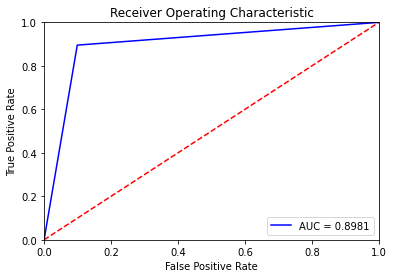

In [ ]:
# calculate roc curves
fpr_entropy,tpr_entropy,threshold_entropy = roc_curve(DT_model.predict(X_test), y_test)
roc_auc_entropy = auc(fpr_entropy,tpr_entropy)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy,tpr_entropy, 'b',label = 'AUC = %0.4f' % roc_auc_entropy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
print(fpr_entropy,tpr_entropy,threshold_entropy)

[0.         0.09915529 1.        ] [0.         0.89529825 1.        ] [2 1 0]


In [ ]:
confusion_matrix(DT_model.predict(X_test), y_test)

array([[89689,  9872],
       [10542, 90144]])

Decision Tree model with default parameters is giving an AUC of 0.892 which is slightly better than the Logistic regression model.
However we haven't specified the tree depth and the number of leaf nodes which might have caused the problem of overfitting.
Let's check with the gini impurity model also.

In [30]:
DT_gini =DecisionTreeClassifier(criterion='gini')
DT_gini_model = DT_gini.fit(X_train , y_train)

In [34]:
print('Decision Trees- Gini Impurity Model performance')
print('Recall: ' ,recall_score(DT_gini_model.predict(X_test), y_test))
print('Accuracy: ' ,accuracy_score(DT_gini_model.predict(X_test), y_test))
print('Precision: ',precision_score(DT_gini_model.predict(X_test), y_test))
print('f1 score: ',f1_score(DT_gini_model.predict(X_test), y_test))
print('roc_auc: ',roc_auc_score(DT_gini_model.predict(X_test), y_test))

Decision Trees- Gini Impurity Model performance
Recall:  0.8953118339265002
Accuracy:  0.8987550375286522
Precision:  0.9028842789302675
f1 score:  0.8990821121376235
roc_auc:  0.8987809370888338


The gini impurity model performs in a similar fashion as the entropy model. Let's tune the hyperparameters and test the same.


In [32]:
depth = [3,5,10,15,20]

In [33]:
gscv =GridSearchCV(DT_gini, param_grid = {'max_depth': depth}, cv =5, scoring= 'roc_auc')

In [35]:
gini_model_cv = gscv.fit(X_train, y_train)

In [36]:
print(gini_model_cv.best_params_)
print(gini_model_cv.best_score_)

{'max_depth': 10}
0.9726387679988872


It's interesting to note that we are getting the best score at a depth of 10. There is a possibility that the model is overfitting. Let's test the same.

In [37]:
best_gini_model = DecisionTreeClassifier(criterion = 'gini',max_depth =10)
best_gini_model_fitted = best_gini_model.fit(X_train,y_train)
print('Recall_Score: ' , recall_score(y_test,best_gini_model_fitted.predict(X_test) ))
print('Accuracy: ' ,accuracy_score(y_test,best_gini_model_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,best_gini_model_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,best_gini_model_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,best_gini_model_fitted.predict(X_test)))


Recall_Score:  0.8557360659835042
Accuracy:  0.9051371556128182
Precision:  0.9493572608999457
f1 score:  0.900118831039088
roc_auc:  0.905088603325611


The model is giving an amazing accuracy of ~90% with test set and the AUC is 0.907. This seems to be a good model to work with. 
However we also see a reduction in accuracy from 97% on training set to 90% on test set. 
Let's test for any overfitting by plotting learning curve. 


In [38]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_gini_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='roc_auc',  n_jobs =-1)


In [ ]:
mean_training = np.mean(train_scores, axis=1)
mean_testing = np.mean(valid_scores, axis=1)
standard_dev_training = np.std(train_scores, axis=1)
standard_dev_testing = np.std(valid_scores, axis=1)

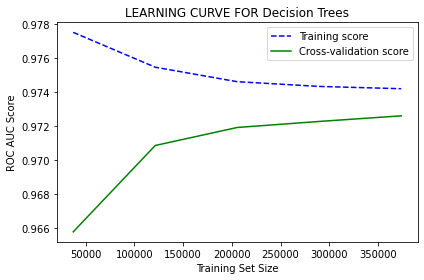

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(train_sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(train_sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR Decision Trees") 
plt.xlabel("Training Set Size"), plt.ylabel("ROC AUC Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()


The learning curves for training set and validation set are seen to converge as more data gets added.  The model is seen to have a low bias(considering the training scores) and a moderate variance(considering how the curves are converging)

In [39]:
gscv_entropy =GridSearchCV(DT_gini, param_grid = {'max_depth': depth}, cv =5, scoring= 'roc_auc')

In [40]:
entropy_model_cv = gscv_entropy.fit(X_train,y_train)

In [41]:
print(entropy_model_cv.best_params_)
print(entropy_model_cv.best_score_)

{'max_depth': 10}
0.9726566558913736


The entropy model is performing well on the training dataset.
Let's check the performance on test dataset with the same parameters.

In [42]:
entropy_model = DecisionTreeClassifier(criterion = 'entropy',max_depth =10)
entropy_model_fitted = entropy_model.fit(X_train, y_train)
print('Recall: ', recall_score(y_test,entropy_model_fitted.predict(X_test) ))
print('Accuracy: ' ,accuracy_score(y_test,entropy_model_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,entropy_model_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,entropy_model_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,entropy_model_fitted.predict(X_test)))

Recall:  0.8555561109722569
Accuracy:  0.9049823468016999
Precision:  0.9492102577754115
f1 score:  0.8999532024755365
roc_auc:  0.9049337698003509


In [43]:
sizes, train_scores, valid_scores = learning_curve(entropy_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='roc_auc',  n_jobs =-1)

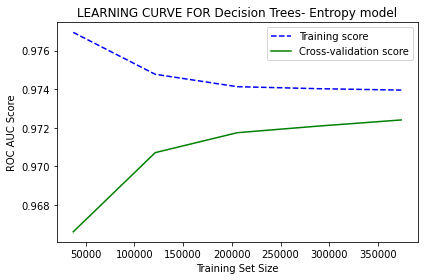

In [ ]:
mean_training = np.mean(train_scores, axis=1)
mean_testing = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(train_sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR Decision Trees- Entropy model") 
plt.xlabel("Training Set Size"), plt.ylabel("ROC AUC Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

Both Entropy and Gini models are performing equally well and are seen to have similar learning curves.

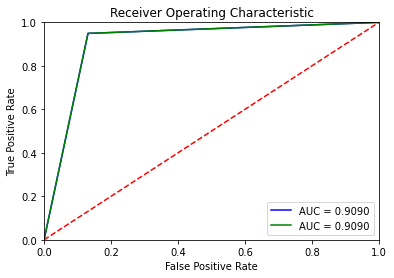

In [44]:
fpr_entropy_opt,tpr_entropy_opt,threshold_entropy_opt = roc_curve(entropy_model_fitted.predict(X_test), y_test)
roc_auc_entropy_opt = auc(fpr_entropy_opt,tpr_entropy_opt)

fpr_gini_opt,tpr_gini_opt,threshold_gini_opt = roc_curve(best_gini_model_fitted.predict(X_test), y_test)
roc_auc_gini_opt = auc(fpr_entropy_opt,tpr_entropy_opt)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy_opt,tpr_entropy_opt, 'b',label = 'AUC = %0.4f' % roc_auc_entropy_opt)
plt.plot(fpr_gini_opt,tpr_gini_opt, 'g',label = 'AUC = %0.4f' % roc_auc_gini_opt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10) 

In [ ]:
rfc_model = rfc.fit(X_train, y_train)

In [ ]:
print('Random Forest Classifier')
print('Recall: ' , recall_score(y_test, rfc_model.predict(X_test) ))
print('Accuracy: ' , accuracy_score(y_test, rfc_model.predict(X_test) ))
print('Precision: ' , precision_score(y_test, rfc_model.predict(X_test) ))
print('f1 score: ' , f1_score(y_test, rfc_model.predict(X_test) ))
print('roc score: ' , roc_auc_score(y_test, rfc_model.predict(X_test) ))

Random Forest Classifier
Recall:  0.8927332881572129
Accuracy:  0.9081434428480826
Precision:  0.9215133622729237
f1 score:  0.9068950506676384
roc score:  0.9081780736224457


In [ ]:
rfc = RandomForestClassifier() 
estimators = [25,50,100,150]
features =[10,20,30,40]
gridsearch_rf= GridSearchCV(rfc, param_grid = {'n_estimators': estimators, 'max_features':features}, cv =5, n_jobs =-1, scoring= 'roc_auc')

In [ ]:
rf_gs= gridsearch_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(rf_gs.best_params_,rf_gs.best_score_)

{'max_features': 40, 'n_estimators': 150} 0.9741215006578428


In [ ]:
rf_gs= gridsearch_rf.fit(X_train,y_train)
print(rf_gs.best_params_,rf_gs.best_score_)

The random forest classifier is giving a higher AUC of 0.97 in comparison to the Decision Trees.
Let's test this model on the test set.

In [51]:
fpr_rfc_best,tpr_rfc_best,threshold_rfc_best = roc_curve(rfc_model.predict(X_test),y_test)
roc_auc_rfc_best = auc(fpr_rfc_best,tpr_rfc_best)

In [ ]:
rfc_best= RandomForestClassifier(n_estimators= 150, max_features= 40) 
rfc_best_fitted = rfc_best.fit(X_train, y_train)
print('Random Forest Classifier- Performance')
print('Recall: ', recall_score(y_test,rfc_best_fitted.predict(X_test)))
print('Accuracy: ' ,accuracy_score(y_test,rfc_best_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,rfc_best_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,rfc_best_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,rfc_best_fitted.predict(X_test)))

Random Forest Classifier- Performance
Recall:  0.8893251484832781
Accuracy:  0.9148851168806524
Precision:  0.9376129438957764
f1 score:  0.9128308988993904
roc_auc:  0.9149425570242494


The AUC of Random Forest is at par with Decision trees. Recall and Accuracy are better. While Precision is seen to be lower.

## Gradient Boosting Classifier

In [45]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
estimators = [10,25,50,100,150]
max_roc_score =0
for learning_rate in learning_rates:
  for estimator in estimators:
    gb = GradientBoostingClassifier(n_estimators=estimator, learning_rate = learning_rate, max_features=2, random_state = 42, max_depth = 2)
    gb_model = gb.fit(X_train, y_train)
    score = roc_auc_score(gb_model.predict(X_test), y_test)
    if score > max_roc_score:
      best_learning_rate = learning_rate
      best_estimator = estimator
      max_roc_score = score

    
print('best_learning_rate is:', best_learning_rate)
print('best_estimator is:', best_estimator )

best_learning_rate is: 0.5
best_estimator is: 150


In [46]:
max_roc_score

0.9362567417366444

In [47]:
gb = GradientBoostingClassifier(n_estimators=150, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb_model = gb.fit(X_train, y_train)
fpr_gb_best,tpr_gb_best,threshold_gb_best = roc_curve(gb_model.predict(X_test),y_test)
roc_auc_gb_best = auc(fpr_gb_best,tpr_gb_best)


In [48]:
roc_auc_gb_best

0.9342131761878961

In [55]:
gb_y = gb_model.predict(X_test)

print("Accuracy score",accuracy_score(gb_y, y_test))
print("Precision score: ", precision_score(gb_y, y_test))
print("Recall score: ", recall_score(gb_y, y_test))
print("Roc score: ", roc_auc_score(gb_y, y_test))

Accuracy score 0.9275245072335665
Precision score:  0.8655436140964758
Recall score:  0.9878594249201278
Roc score:  0.9342131761878961


The model seems to be performing well in terms of roc score for a learning rate of 0.5 and 150 estimators.  The recall is high at 0.98 and the precision low at 0.86 which is an indicator of the model leaning towards more false positives.

Support Vector classifier could not be used due to large size of the dataset and high memory usage.

Of all the models trained above, Decision trees seem to be the best in terms of Roc as well as recall.
Let's represent a comparison of all the models visually.

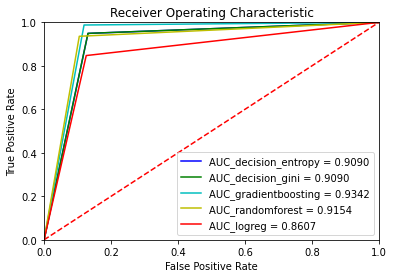

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy_opt,tpr_entropy_opt, 'b',label = 'AUC_decision_entropy = %0.4f' % roc_auc_entropy_opt)
plt.plot(fpr_gini_opt,tpr_gini_opt, 'g',label = 'AUC_decision_gini = %0.4f' % roc_auc_gini_opt)
plt.plot(fpr_gb_best,tpr_gb_best, 'c',label = 'AUC_gradientboosting = %0.4f' % roc_auc_gb_best)
plt.plot(fpr_rfc_best,tpr_rfc_best, 'y',label = 'AUC_randomforest = %0.4f' % roc_auc_rfc_best)
plt.plot(fpr_logreg_best,tpr_logreg_best, 'r',label = 'AUC_logreg = %0.4f' % roc_auc_logreg_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
pd.DataFrame(dict({'Precision':[0.87, 0.937,0.949,0.949, 0.8824 ], 'Recall': [0.987, 0.89, 0.856,0.856, 0.846  ], 'Accuracy' : [0.92, 0.914, 0.905, 0.905, 0.861], 'Roc_Auc_score' :[0.93, 0.915, 0.905, 0.905, 0.862 ]}), index = ['Gradient Boosting', 'Random Forest', 'Decision Trees-Entropy', 'Decision Trees-Gini', 'Logistic reg' ])

,Precision,Recall,Accuracy,Roc_Auc_score
Gradient Boosting,0.8700,0.987,0.920,0.930
Random Forest,0.9370,0.890,0.914,0.915
Decision Trees-Entropy,0.9490,0.856,0.905,0.905
Decision Trees-Gini,0.9490,0.856,0.905,0.905
Logistic reg,0.8824,0.846,0.861,0.862


Gradient Boosting is seen to have the highest area under the curve but is having more false positives for a higher number of True positives. 

Random Forest having a slightly lower AUC. It is classifying True positives and a smaller rate of False positives.

In case of Insurance leads, a False positive only leads to a customer who is less likely to respond to a cross sale lead. Hence we are OK with a higher True positive rate at the cost of a small False negative rate. 

## Observation and Conclusion:

Gradient Boosting can be seen outperforming its counterparts in terms of AUC and Recall . The True positive rate is higher at the cost of a slightly high False negative rate in comparison with the remaining models.

Hence Gradient Boosting can be considered for Predicting the responses of the customers based on their profiling.